## B01: 必要なパッケージを読み込む

In [1]:
library(Seurat)


Attaching SeuratObject



In [2]:
library(Seurat)
library(tidyverse)

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## B02: シードの固定

In [3]:
set.seed(1234)

## B03: データ（遺伝子発現量行列）を読み込む

In [4]:
# （ちょっと時間がかかります）
df_counts <- read_tsv("data/GSM3173562_Lakshmipuram_NCBI_processeddata.txt", col_names=TRUE)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  GENE = col_character()
)
ℹ Use `spec()` for the full column specifications.




## B04: 読み込んだデータの形を確認する

In [5]:
# 中身の確認
df_counts

GENE,TAAGTTTGCAAT,CGCGACAGACTA,CCGATCCAGCCT,AATGGTATCCCT,TAAGTCACATCC,AACGACAACAGT,GCTCTTCTAAGA,ACGGCTTTTTAG,ACACCGGGCCGC,⋯,CTACTCAGAAAA,CAGTACGTAATA,GCTAAGCGATAA,ATGATAATGAAA,GACCATCGCCAA,TGAGTGCGCGGA,AGTTGCTCCCAA,AAATACGTATGG,CAAGGGTGCCGA,GGTGTGGATAGG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BPKG21685,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Bmi-1[1]_SmedASXL_000659,1,0,0,0,2,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CCD-like_smed016097,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
H.1.3b_spondin_SmedASXL_017661,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LGR4_SmedASXL_005791,0,1,0,0,0,0,3,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LGR4l_SmedASXL_014091,0,0,0,0,2,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
Smed-APC_smed014505_SmedASXL_000490_SmedASXL_002637,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Smed-Bcat-1_SmedASXL_006667,0,0,0,2,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
Smed-COE_SmedASXL_000653,0,0,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
# 行数
nrow(df_counts)

# 列数
ncol(df_counts)

[1] 51562

[1] 2001

## B05: データを Seurat の形に変換する

In [7]:
# データフレームを行列に変換する
df_counts %>% 
select(-GENE) %>% 
as.matrix() ->
mat_counts

# データフレーム df_counts の GENE という列の内容を行列 mat_counts の行の名前に利用する
rownames(mat_counts) <- df_counts$GENE

In [8]:
# 作った行列の構造を確認
str(mat_counts)

 num [1:51562, 1:2000] 0 1 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:51562] "BPKG21685" "Bmi-1[1]_SmedASXL_000659" "CCD-like_smed016097" "H.1.3b_spondin_SmedASXL_017661" ...
  ..$ : chr [1:2000] "TAAGTTTGCAAT" "CGCGACAGACTA" "CCGATCCAGCCT" "AATGGTATCCCT" ...


In [9]:
# Seurat オブジェクトに変換する
planarian <-  CreateSeuratObject(counts = mat_counts, project = "planarian_2k")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [10]:
# 作った Seurat オブジェクト (planarian) を確認する
planarian

An object of class Seurat 
51562 features across 2000 samples within 1 assay 
Active assay: RNA (51562 features, 0 variable features)

## B06: 品質の低い細胞をフィルターする

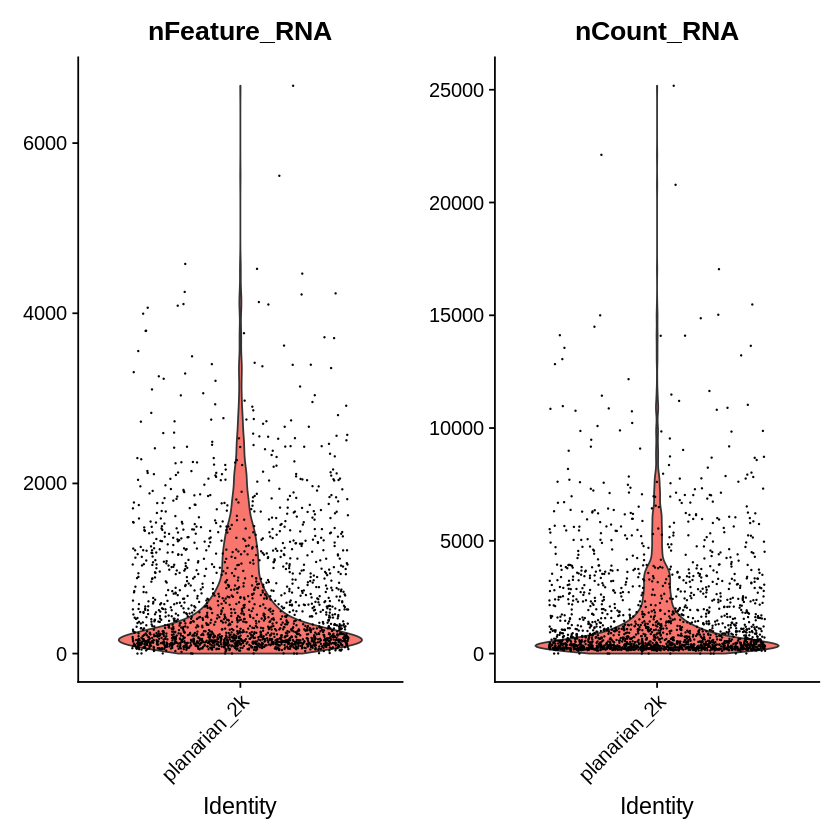

In [11]:
VlnPlot(planarian, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

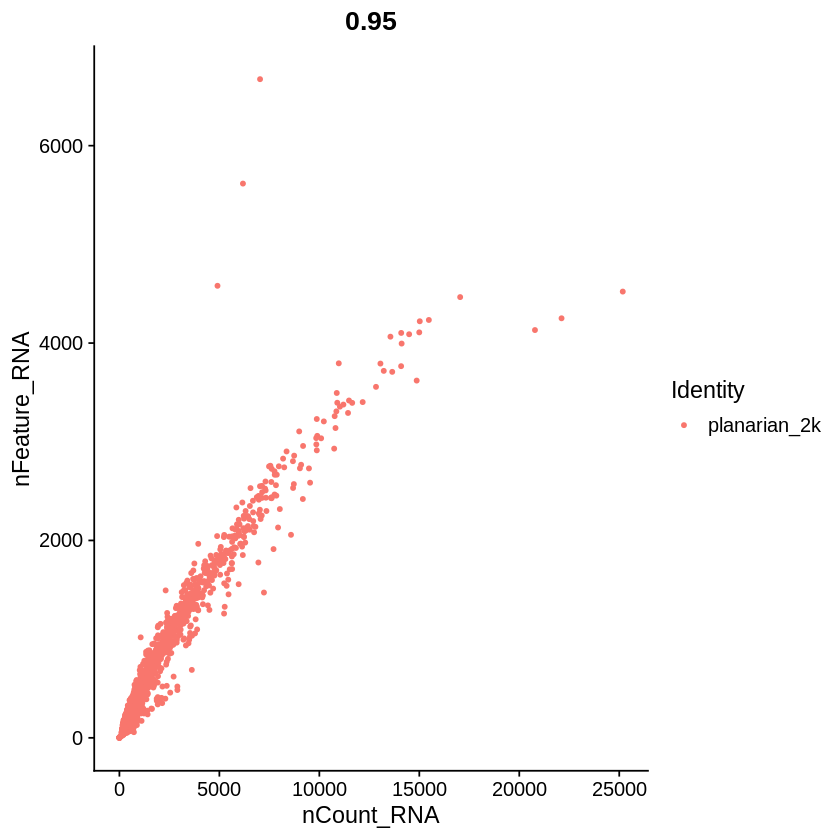

In [12]:
FeatureScatter(planarian, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

In [13]:
planarian <- subset(planarian, subset = nFeature_RNA >= 200 & nCount_RNA >= 500)

In [14]:
planarian

An object of class Seurat 
51562 features across 1131 samples within 1 assay 
Active assay: RNA (51562 features, 0 variable features)

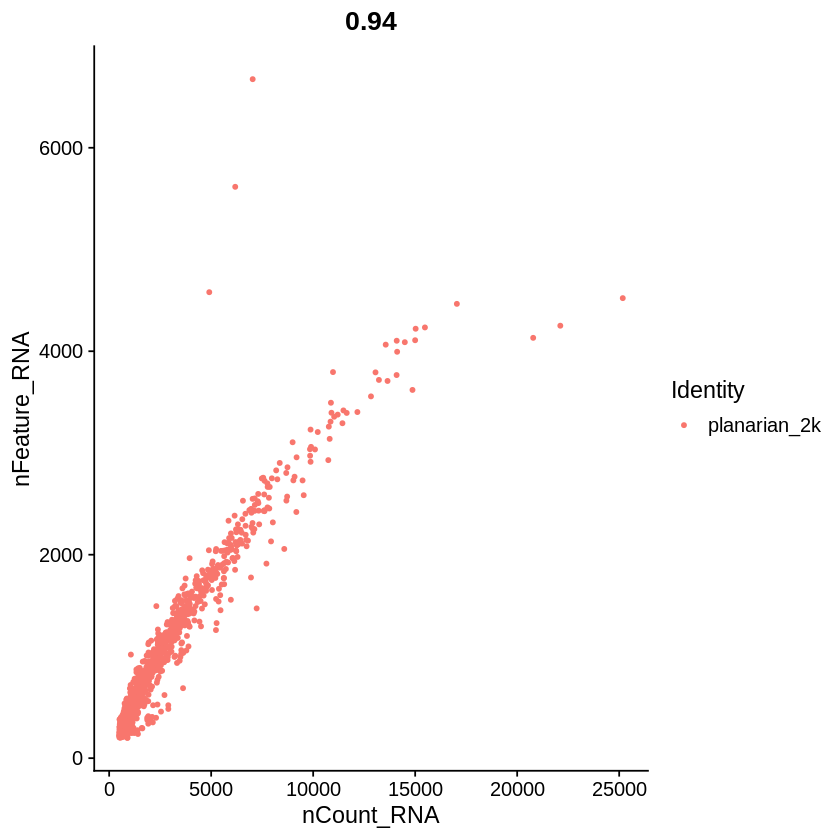

In [15]:
FeatureScatter(planarian, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

## B07: 発現量データを正規化する

In [16]:
planarian <- NormalizeData(planarian, normalization.method = "LogNormalize", scale.factor = 10000)

## B08: 高変動遺伝子（highly variabe genes) を抽出する

In [17]:
planarian <- FindVariableFeatures(planarian, selection.method = "vst", nfeatures = 2000)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.083”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.33061”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”


In [18]:
top10 <- head(VariableFeatures(planarian), 10)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


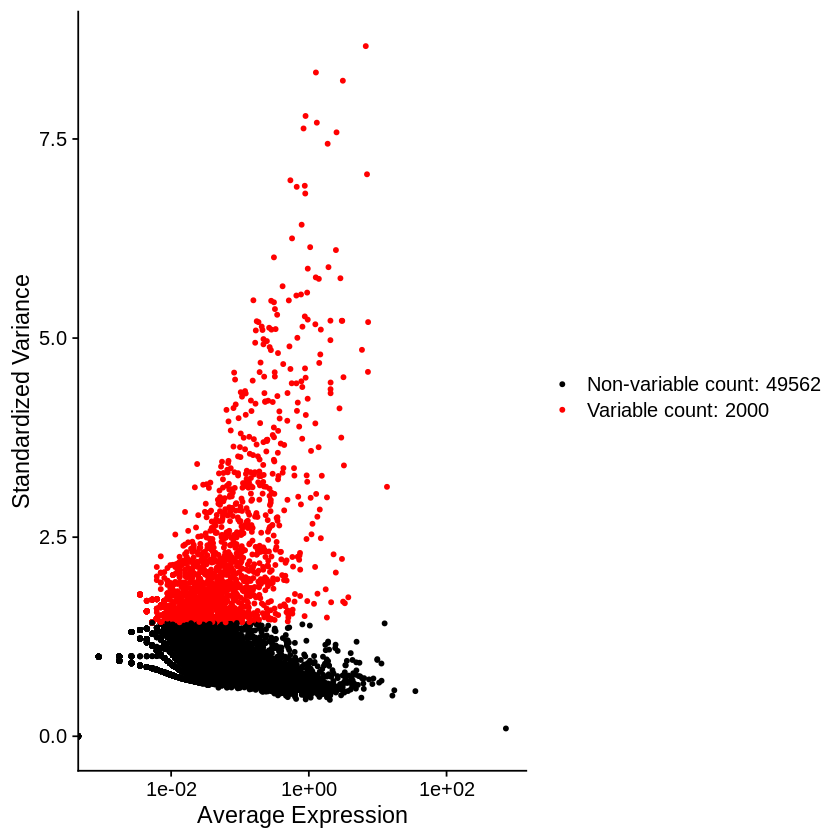

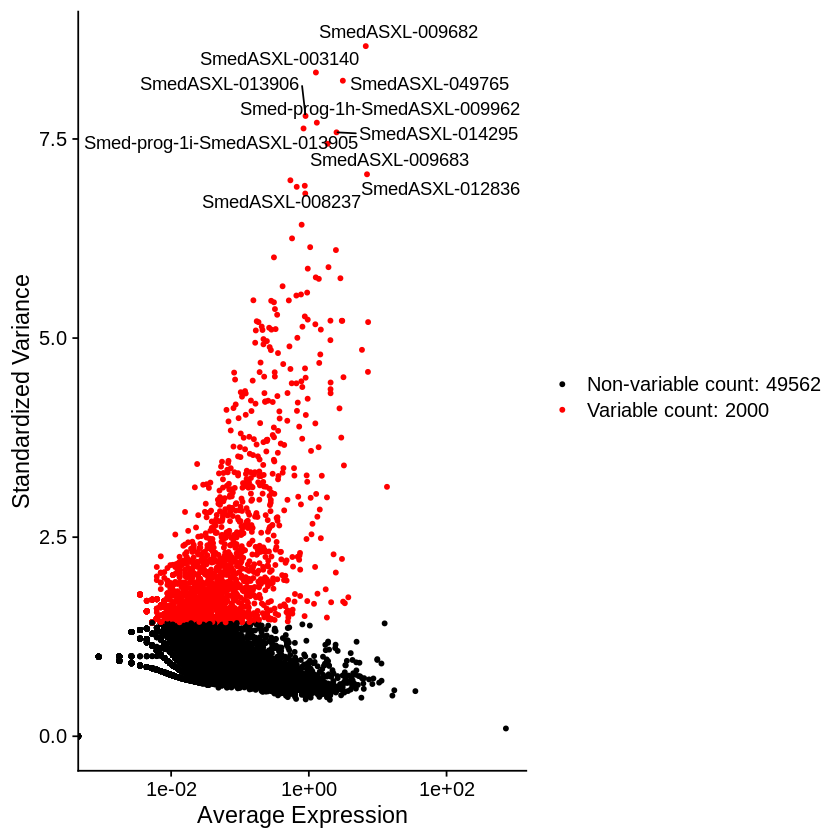

In [19]:
plot1 <- VariableFeaturePlot(planarian)
plot1
LabelPoints(plot = plot1, points = top10, repel = TRUE)

## B09: データをスケーリングする



In [20]:
# 少し時間がかかります
all.genes <- rownames(planarian)
planarian <- ScaleData(planarian, features = all.genes)

Centering and scaling data matrix



## B10: PCA（主成分分析）を用いて次元削減を行う

In [21]:
planarian <- RunPCA(planarian, features = VariableFeatures(object = planarian))

PC_ 1 
Positive:  SmedASXL-010882, SmedASXL-018040, SmedASXL-039160, SmedASXL-002399, SmedASXL-004429, SmedASXL-004691, SmedASXL-072126, Smed-prog-1h-SmedASXL-009962, SmedASXL-043921, SmedASXL-066574 
	   SmedASXL-012205, SmedASXL-071929, Smed-prog1g-SmedASXL-003595, SmedASXL-002991, SmedASXL-059323, SmedASXL-011559, SmedASXL-002064, SmedASXL-002169, SmedASXL-041705, SmedASXL-000915 
	   SmedASXL-002794, SmedASXL-003039, SmedASXL-077631, SmedASXL-019259, SmedASXL-009939, SmedASXL-004080, Smed-prog-1e-SmedASXL-004473, SmedASXL-005341, SmedASXL-004067, SmedASXL-006858 
Negative:  SmedASXL-007995, SmedASXL-017153, SmedASXL-018827, SmedASXL-007801, SmedASXL-016498, SmedASXL-016756, SmedASXL-017925, SmedASXL-018822, SmedASXL-006925, SmedASXL-006640 
	   SmedASXL-016763, SmedASXL-003474, SmedASXL-017924, SmedASXL-003960, SmedASXL-006602, SmedASXL-004205, SmedASXL-013316, SmedASXL-018727, SmedASXL-006502, SmedASXL-009504 
	   SmedASXL-018990, SmedASXL-004168, SmedASXL-016622, SmedASXL-018692,

In [22]:
print(planarian[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  SmedASXL-010882, SmedASXL-018040, SmedASXL-039160, SmedASXL-002399, SmedASXL-004429 
Negative:  SmedASXL-007995, SmedASXL-017153, SmedASXL-018827, SmedASXL-007801, SmedASXL-016498 
PC_ 2 
Positive:  SmedASXL-012760, SmedASXL-004168, SmedASXL-006925, SmedASXL-010882, SmedASXL-018692 
Negative:  SmedASXL-061273, SmedASXL-025551, SmedASXL-008144, SmedASXL-004179, SmedASXL-006564 
PC_ 3 
Positive:  SmedASXL-061273, SmedASXL-018633, SmedASXL-008144, SmedASXL-025551, SmedASXL-006649 
Negative:  SmedASXL-008653, SmedASXL-006346, SmedASXL-025702, SmedASXL-017551, Smed-prog-1-NB.21.11e-SmedASXL-011484 
PC_ 4 
Positive:  SmedASXL-018149, SmedASXL-025551, SmedASXL-006649, SmedASXL-072646, SmedASXL-008144 
Negative:  SmedASXL-018694, SmedASXL-017190, SmedASXL-049765, SmedASXL-018220, SmedASXL-009754 
PC_ 5 
Positive:  SmedASXL-049765, SmedASXL-018694, SmedASXL-010496, SmedASXL-003877, SmedASXL-010614 
Negative:  SmedASXL-017403, SmedASXL-011362, SmedASXL-009012, SmedASXL-008913, 

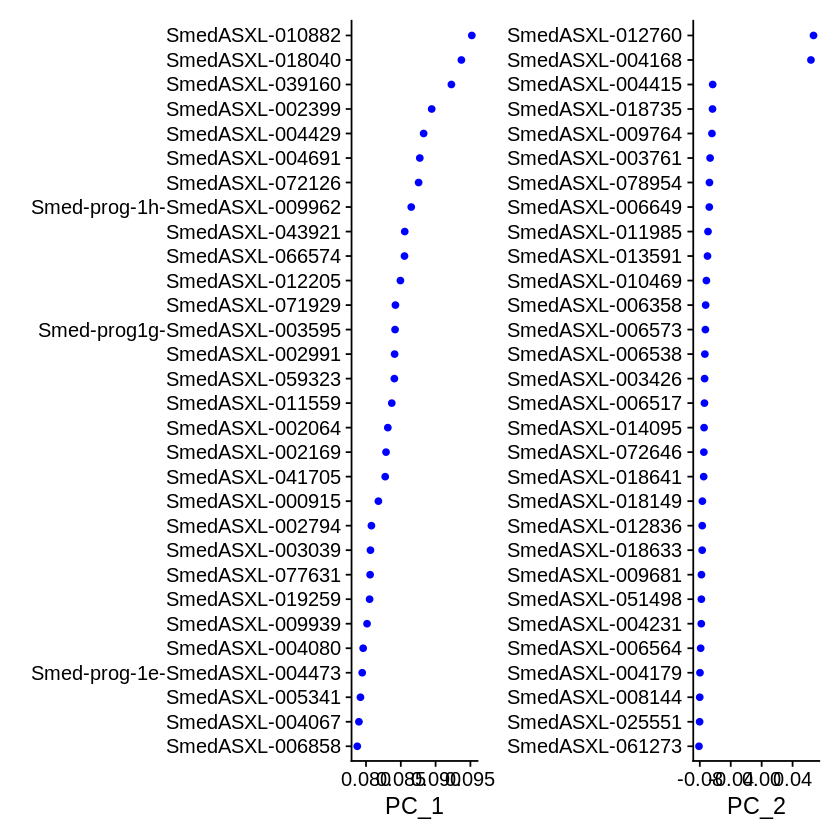

In [23]:
VizDimLoadings(planarian, dims = 1:2, reduction = "pca")

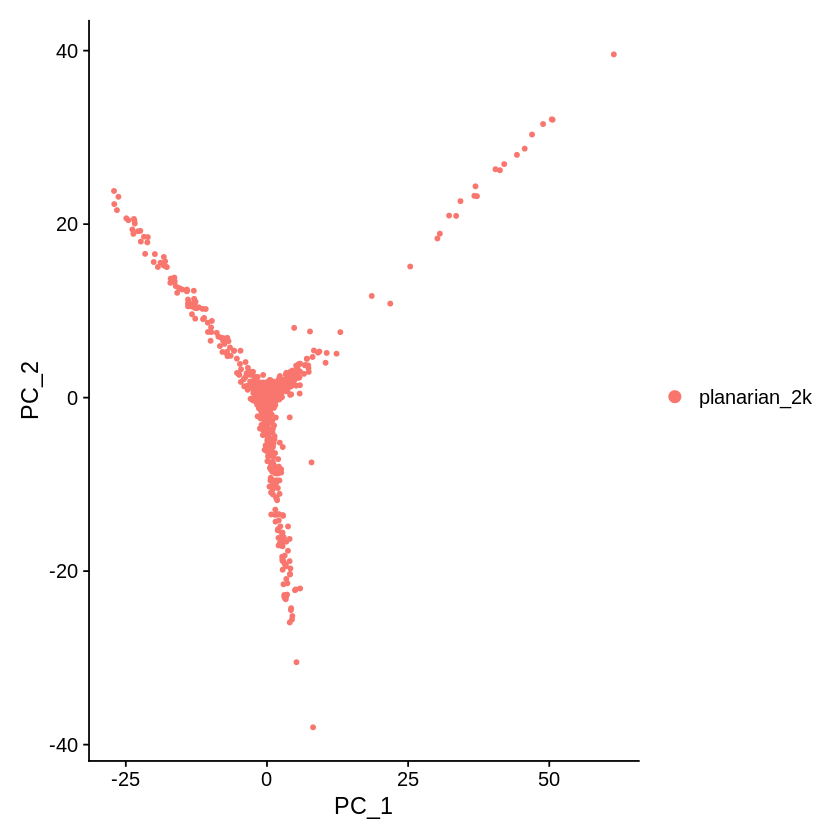

In [24]:
DimPlot(planarian, reduction = "pca")

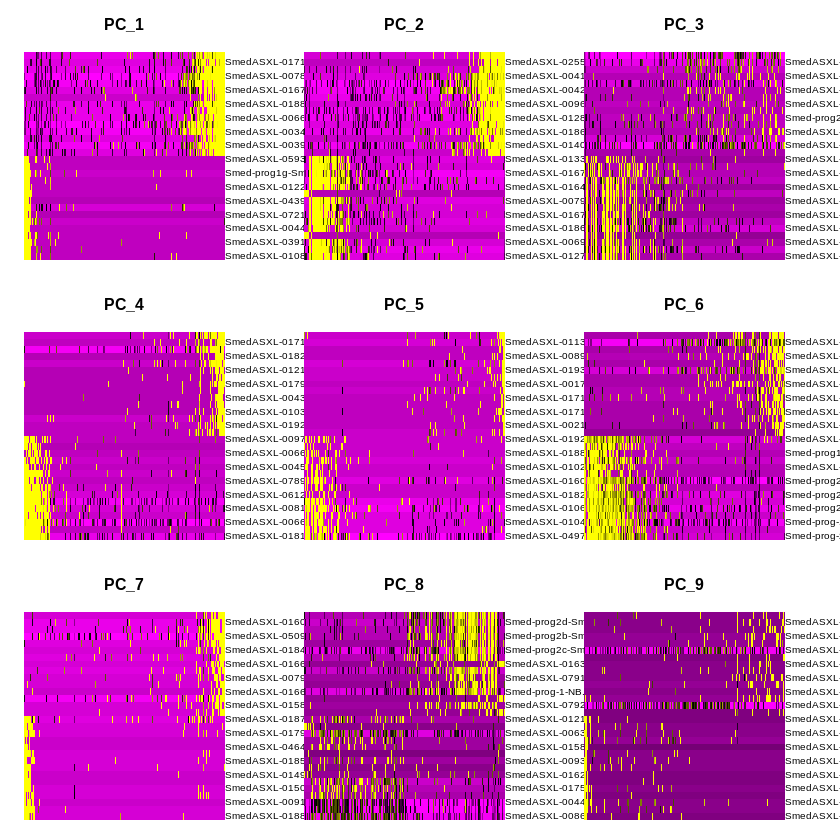

In [25]:
DimHeatmap(planarian, dims = 1:9, cells = 500, balanced = TRUE)


## B11: データの有効な次元数を調べる


In [26]:
# 少し時間がかかります
planarian <- JackStraw(planarian, num.replicate = 100)
planarian <- ScoreJackStraw(planarian, dims = 1:20)

Warning message:
“Removed 21892 rows containing missing values (geom_point).”


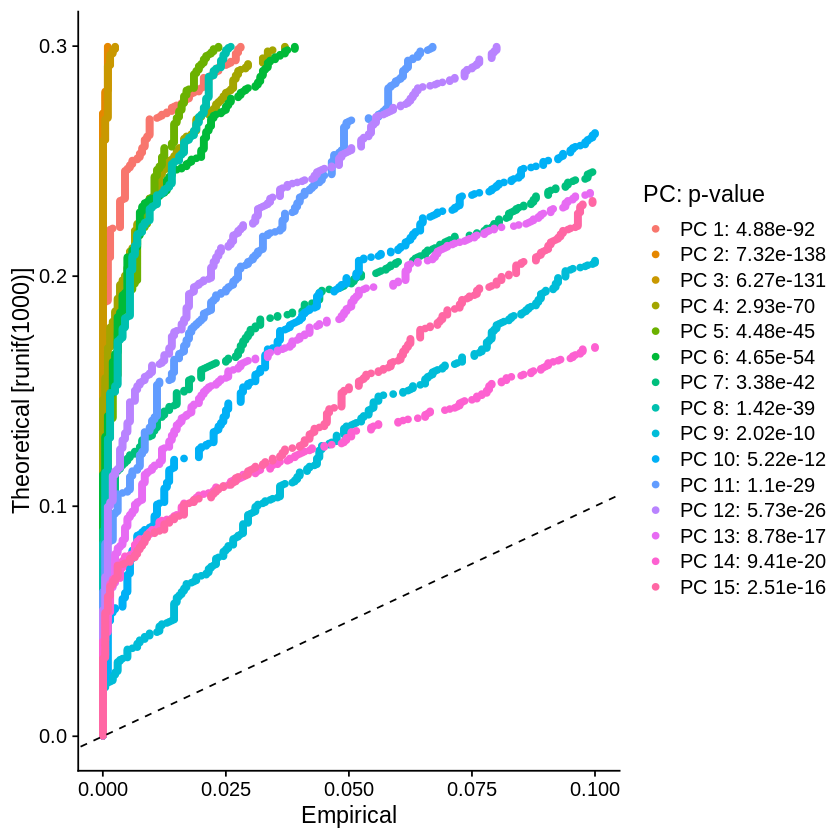

In [27]:
JackStrawPlot(planarian, dims = 1:15)

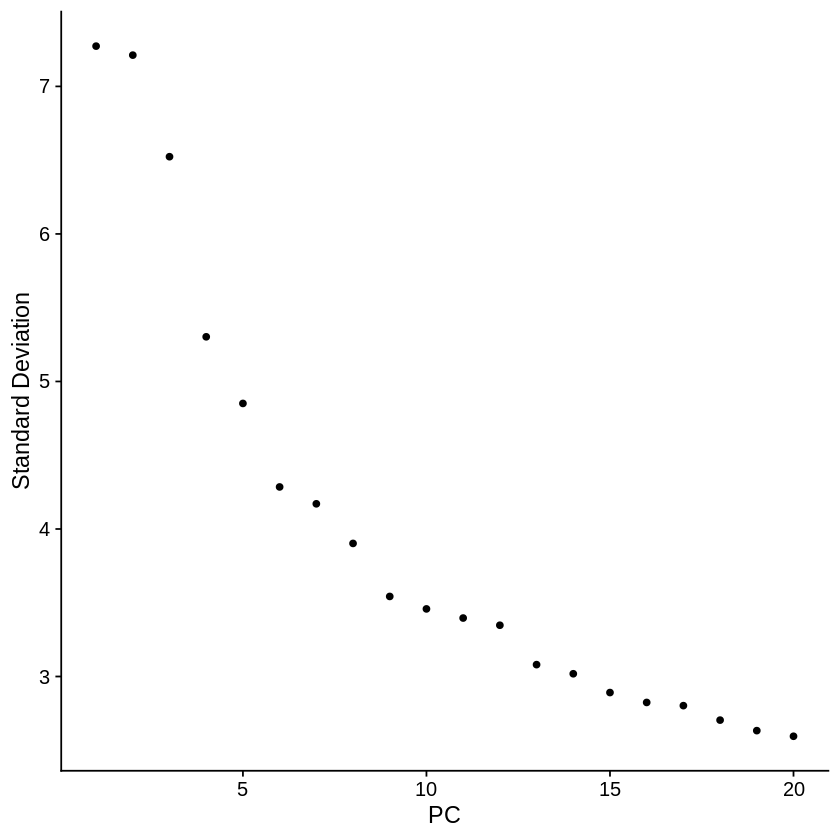

In [28]:
ElbowPlot(planarian)

## B12: 細胞をクラスタリングする

In [29]:
planarian <- FindNeighbors(planarian, dims = 1:10)
planarian <- FindClusters(planarian, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1131
Number of edges: 31588

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8596
Number of communities: 10
Elapsed time: 0 seconds


In [30]:
head(Idents(planarian), 10)

head(planarian$seurat_clusters, 10)

TAAGTTTGCAAT CGCGACAGACTA CCGATCCAGCCT AATGGTATCCCT TAAGTCACATCC AACGACAACAGT 
           5            4            0            8            4            0 
GCTCTTCTAAGA ACGGCTTTTTAG ACACCGGGCCGC CCCCGCTGGTGT 
           0            0            0            0 
Levels: 0 1 2 3 4 5 6 7 8 9

TAAGTTTGCAAT CGCGACAGACTA CCGATCCAGCCT AATGGTATCCCT TAAGTCACATCC AACGACAACAGT 
           5            4            0            8            4            0 
GCTCTTCTAAGA ACGGCTTTTTAG ACACCGGGCCGC CCCCGCTGGTGT 
           0            0            0            0 
Levels: 0 1 2 3 4 5 6 7 8 9

In [31]:
as_tibble(Idents(planarian), rownames = "cell_barcode") %>% 
    head

cell_barcode,value
<chr>,<fct>
TAAGTTTGCAAT,5
CGCGACAGACTA,4
CCGATCCAGCCT,0
AATGGTATCCCT,8
TAAGTCACATCC,4
AACGACAACAGT,0


In [32]:
as_tibble(Idents(planarian), rownames = "cell_barcode") %>% 
    group_by(value) %>%
    summarise(n_cell = n())

,value,n_cell
,<fct>,<int>
1,0,446
2,1,164
3,2,116
4,3,108
5,4,83
6,5,75
7,6,74
8,7,27
9,8,20


## B13: PCAの結果にさらにUMAPをかけて２次元空間に射影する

In [33]:
planarian <- RunUMAP(planarian, dims = 1:10)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
06:22:16 UMAP embedding parameters a = 0.9922 b = 1.112

06:22:16 Read 1131 rows and found 10 numeric columns

06:22:16 Using Annoy for neighbor search, n_neighbors = 30

06:22:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:22:16 Writing NN index file to temp file /tmp/RtmpopZTTB/file29596e747fd3

06:22:16 Searching Annoy index using 1 thread, search_k = 3000

06:22:17 Annoy recall = 100%

06:22:17 Commencing smooth kNN distance calibration using 1 thread

06:22:18 Initializing fro

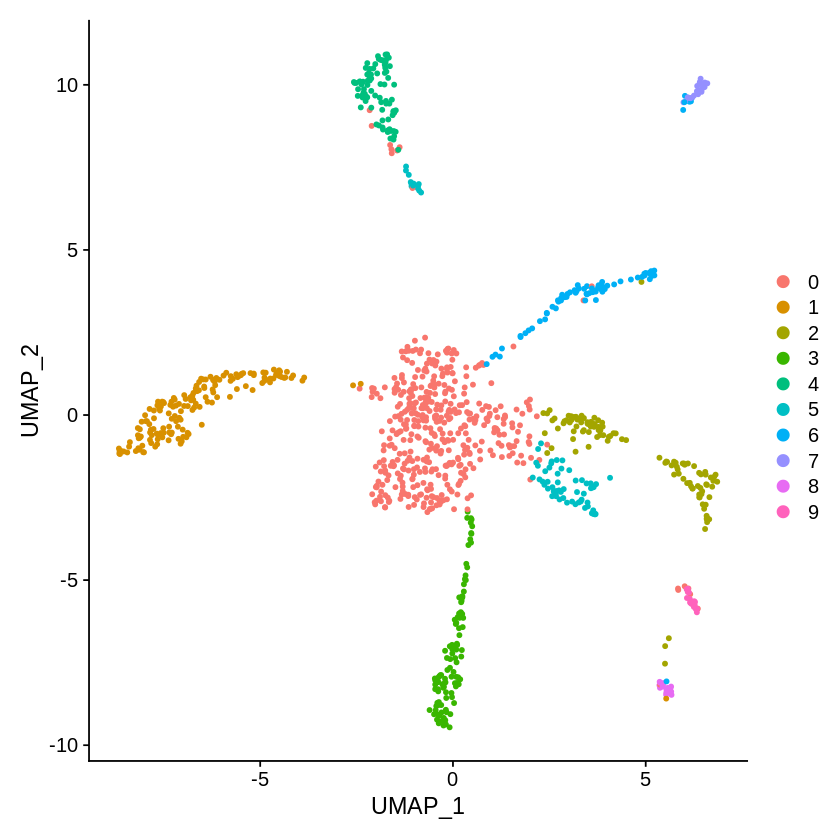

In [34]:
DimPlot(planarian, reduction = "umap")


## B14: 各クラスターに特徴的な遺伝子群を探す

In [35]:
# find all markers of cluster 1
cluster1_markers <- FindMarkers(planarian, ident.1 = 2, min.pct = 0.25)
head(cluster1_markers, n = 5)

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SmedASXL-010967,7.268804e-78,2.833797,0.466,0.020,3.747941e-73
SmedASXL-013691,4.304028e-70,2.837856,0.491,0.033,2.219243e-65
SmedASXL-003695,3.910242e-55,2.528829,0.405,0.029,2.016199e-50
SmedASXL-008738,1.412336e-54,2.925804,0.422,0.033,7.282289e-50
SmedASXL-065416,7.222386e-47,2.338093,0.914,0.407,3.724007e-42


In [36]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5_markers <- FindMarkers(planarian, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
head(cluster5_markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SmedASXL-010722,5.453319e-24,2.348967,0.320,0.027,2.811840e-19
SmedASXL-061405,5.572977e-24,3.645470,0.720,0.267,2.873538e-19
SmedASXL-019170,1.446167e-21,1.725582,0.267,0.018,7.456728e-17
SmedASXL-006919,6.972630e-21,-1.764207,0.853,0.949,3.595228e-16
SmedASXL-078973,1.332273e-18,1.729191,0.387,0.065,6.869466e-14


In [37]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
planarian_markers <- FindAllMarkers(planarian, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [38]:
planarian_markers %>% 
    group_by(cluster) %>% 
    top_n(n = 2, wt = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
8.033627e-77,2.237288,0.771,0.328,4.142299e-72,0,SmedASXL-008653
5.587524e-45,1.817355,0.621,0.288,2.881039e-40,0,SmedASXL-006346
3.318485e-121,4.599959,0.915,0.150,1.711077e-116,1,Smed-prog-2a-SmedASXL-014068-BPKG56961
4.262424e-86,5.143246,0.939,0.380,2.197791e-81,1,Smed-prog-1-NB.21.11e-SmedASXL-011484
5.115466e-37,3.248387,0.302,0.026,2.637637e-32,2,SmedASXL-012349
1.747801e-19,5.378763,0.310,0.068,9.012013e-15,2,SmedASXL-001927
5.202741e-85,5.360932,0.926,0.209,2.682637e-80,3,SmedASXL-007801
6.373440e-45,5.380498,0.769,0.253,3.286273e-40,3,SmedASXL-014295
5.770853e-56,6.332303,0.916,0.307,2.975567e-51,4,SmedASXL-018633


## B15: クラスターごとに遺伝子発現量をプロットする

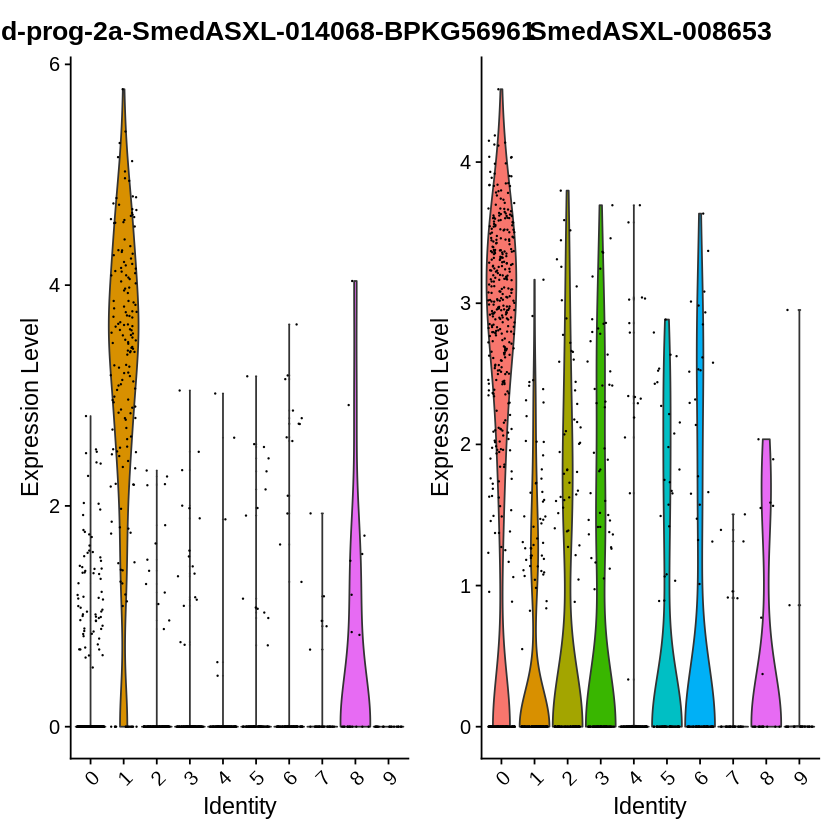

In [39]:
VlnPlot(planarian, features = c("Smed-prog-2a-SmedASXL-014068-BPKG56961", "SmedASXL-008653"))


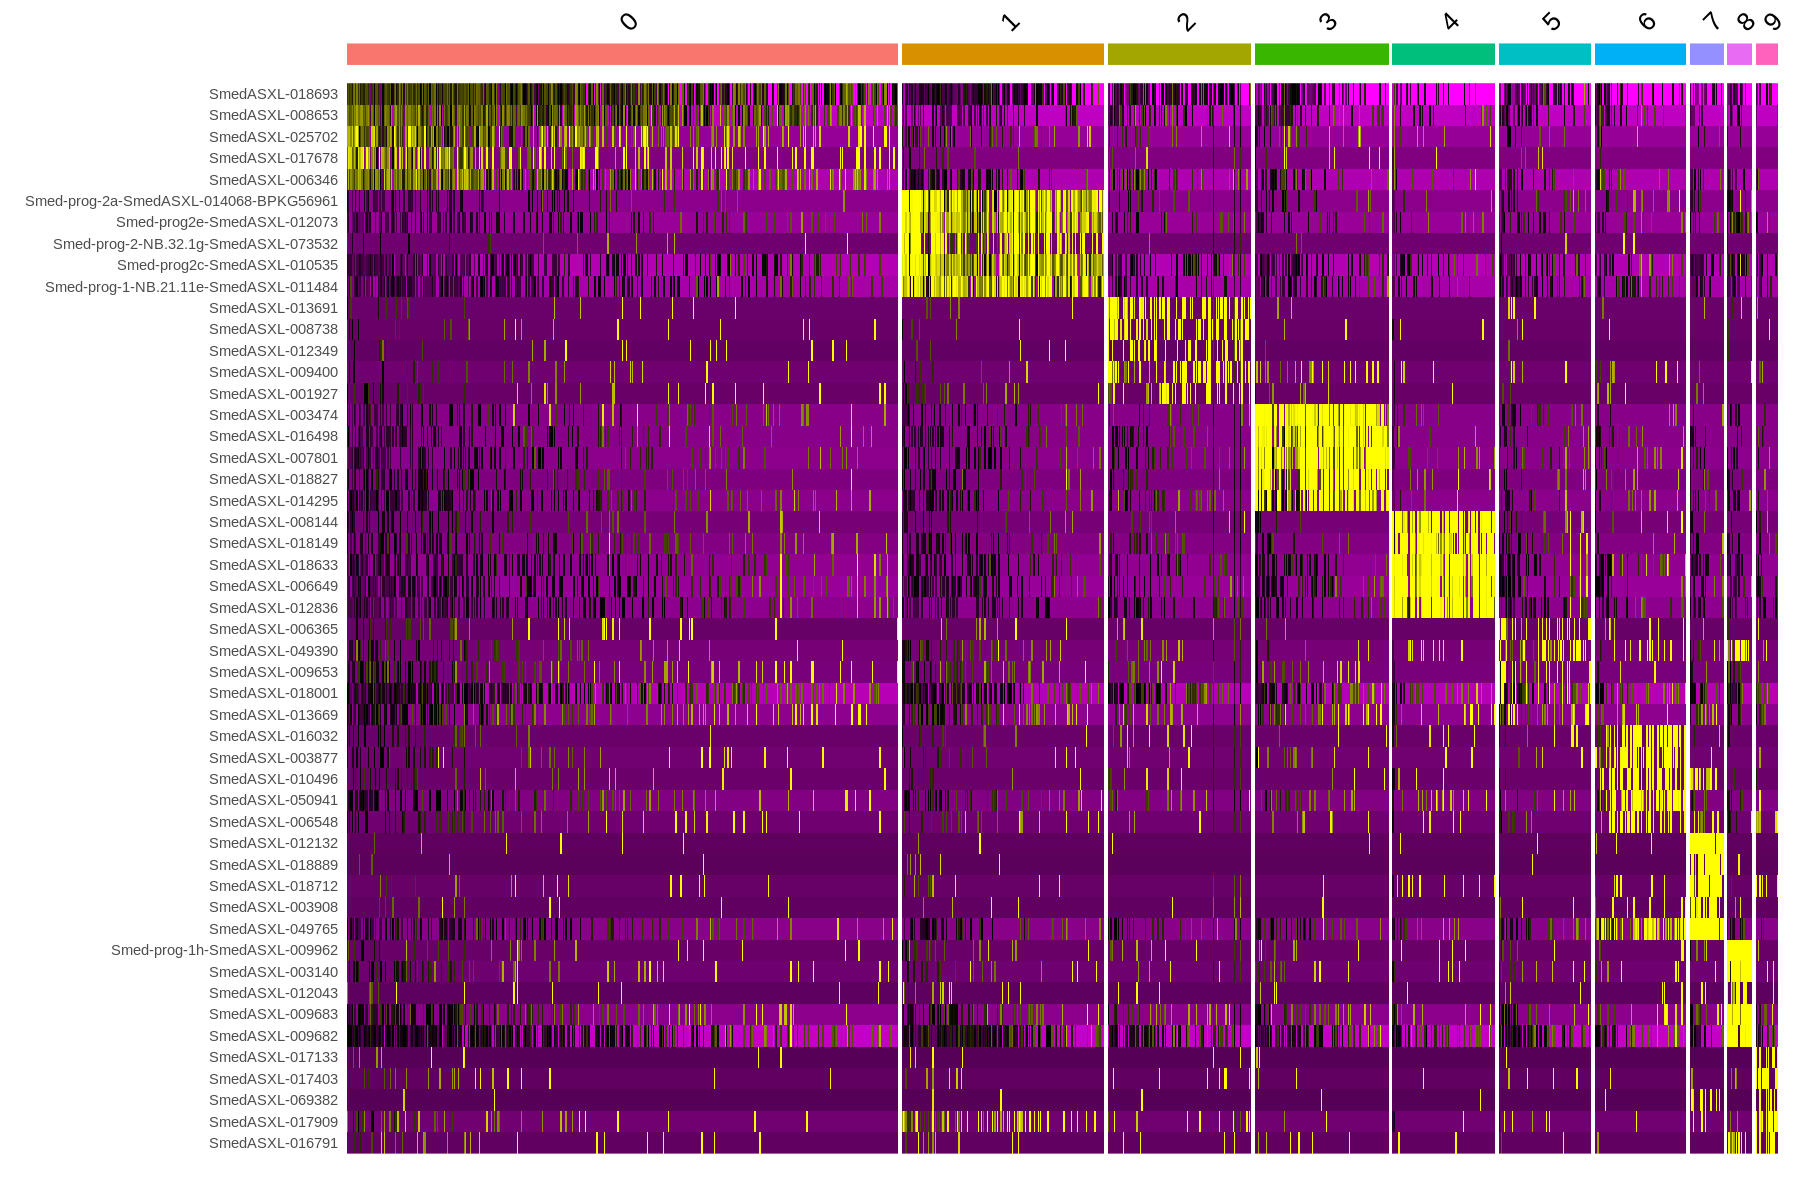

In [40]:
top10 <- planarian_markers %>% 
                    group_by(cluster) %>% 
                    top_n(n = 5, wt = avg_log2FC)

options(repr.plot.width=15, repr.plot.height=10)

DoHeatmap(planarian, features = top10$gene) + NoLegend()

## B16: 遺伝子発現量をUMAPの図に重ねる

In [41]:
planarian_markers %>% 
    group_by(cluster) %>% 
    top_n(n = 1, wt = avg_log2FC) %>%
    .$gene -> each_cluster_features

each_cluster_features

[1] "SmedASXL-008653"                      
 [2] "Smed-prog-1-NB.21.11e-SmedASXL-011484"
 [3] "SmedASXL-001927"                      
 [4] "SmedASXL-014295"                      
 [5] "SmedASXL-012836"                      
 [6] "SmedASXL-018001"                      
 [7] "SmedASXL-050941"                      
 [8] "SmedASXL-049765"                      
 [9] "SmedASXL-009682"                      
[10] "SmedASXL-017909"

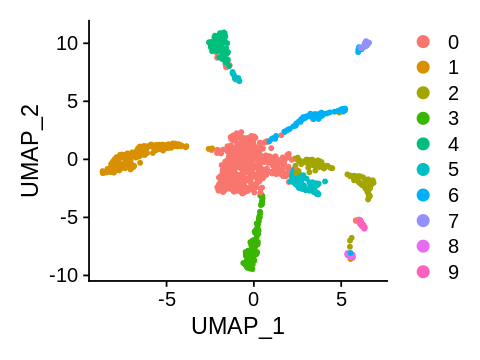

In [42]:
options(repr.plot.width=4, repr.plot.height=3)

DimPlot(planarian, reduction = "umap")

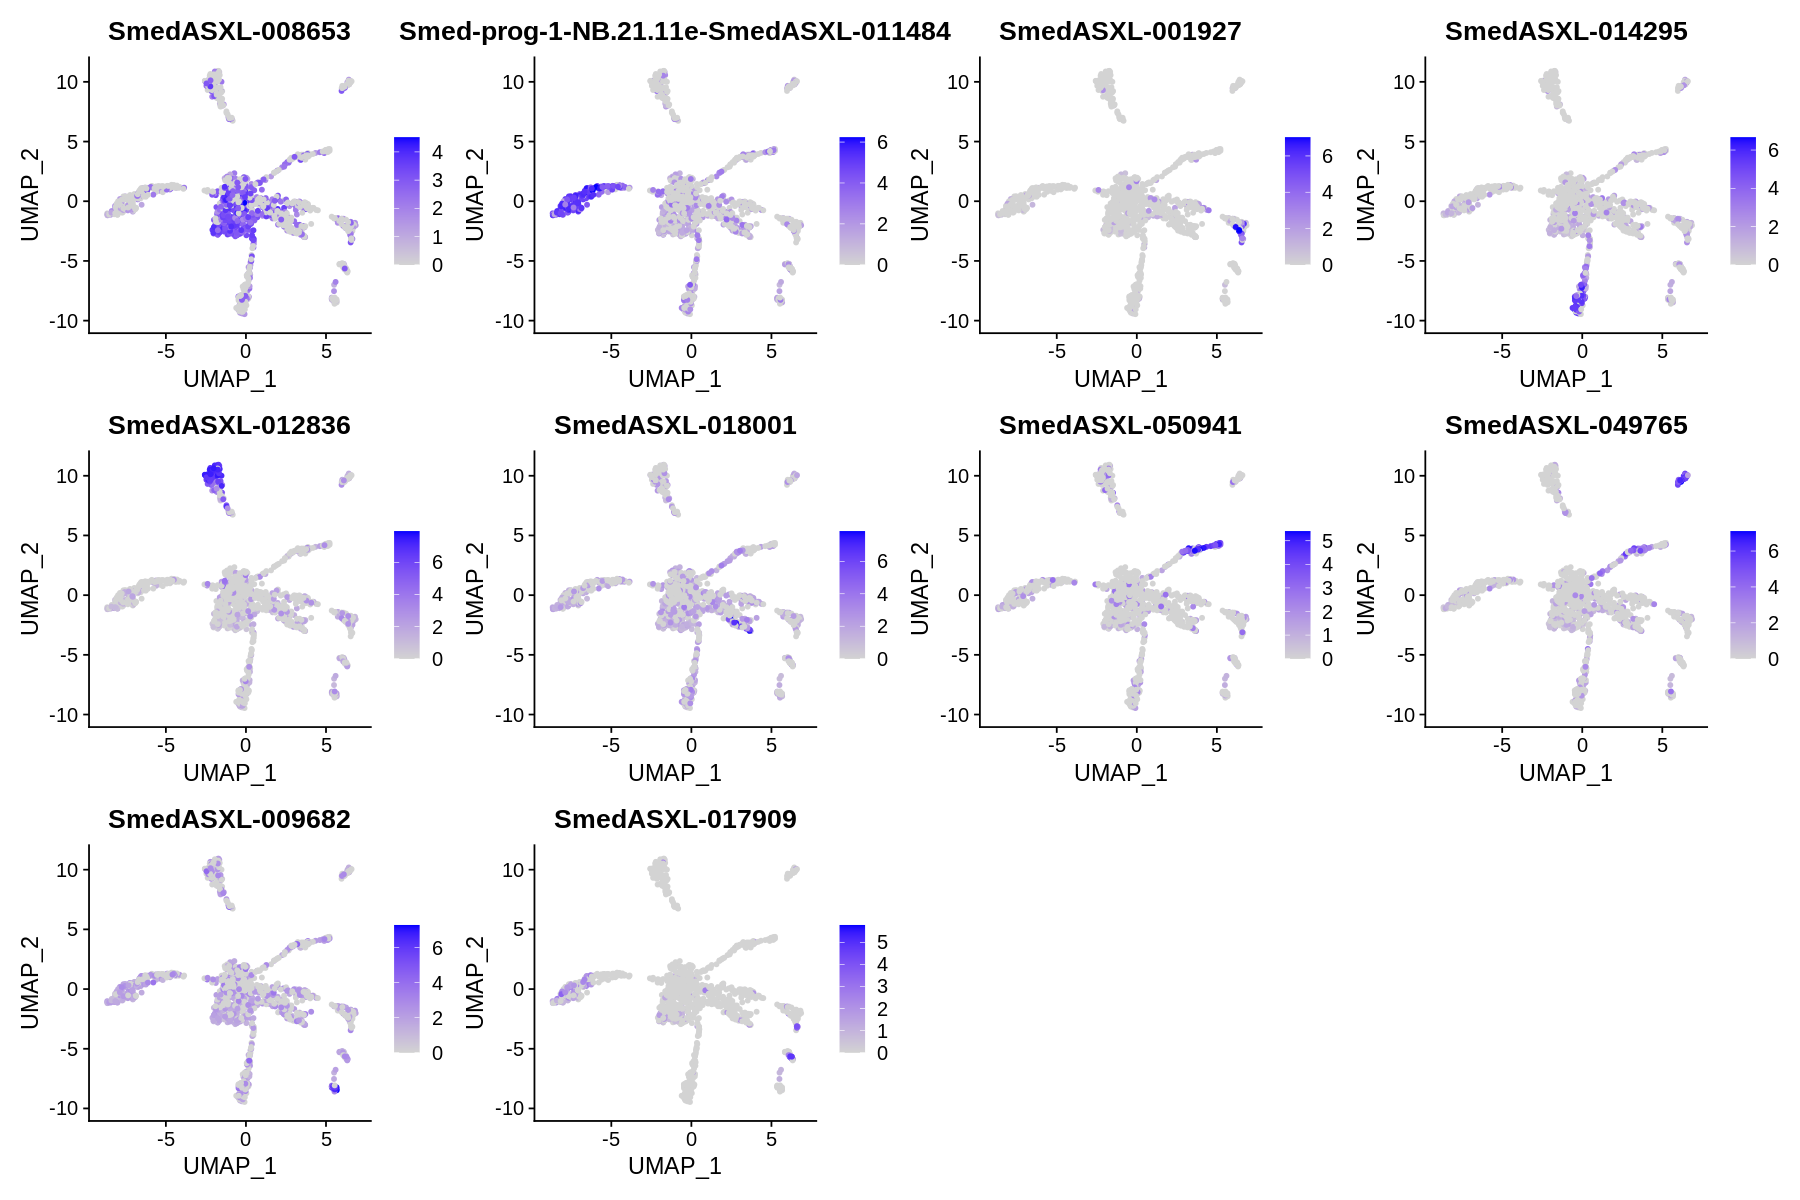

In [43]:
options(repr.plot.width=15, repr.plot.height=10)

FeaturePlot(planarian, features = each_cluster_features)

In [45]:
saveRDS(planarian_markers, file = "planarian_markers.rds")
saveRDS(planarian, file = "planarian_B01-B16.rds")

# 発展



以下のコマンドをターミナルで打つと、ヒトとプラナリアのオーソログ関係の表（一部）がダウンロードできる

```
$ cd data
$ wget https://raw.githubusercontent.com/bioinfo-tsukuba/20201226-EB62104-bioinformatics-course/master/human_ortholog_subset.tsv
```

各クラスターに特徴的な遺伝子から、各クラスターの細胞の機能を類推せよ

joinを使うとよい

## B21: ヒトとプラナリアのオーソログ関係の表を読み込む

In [44]:
human_ortholog = read_tsv("data/human_ortholog_subset.tsv", col_names=TRUE)

ERROR: Error: 'data/human_ortholog_subset.tsv' does not exist in current working directory ('/home/user00').


In [ ]:
str(human_ortholog)

In [ ]:
human_ortholog %>%
    mutate(Smed_Code2 = gsub("_", "-", Smed_Code)) -> human_ortholog

## B22: 各クラスターに特徴的な遺伝子群のヒトオーソログを抽出する

In [ ]:
planarian_markers %>% head

In [ ]:
planarian_markers %>%
    filter(cluster == 0) %>%
    inner_join(human_ortholog, by=c("gene" = "Smed_Code2"))